In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Tau Ceti will make a good proxy for late G stars. E140M data, will need to put it through STISfix.

In [4]:
star = 'tau_ceti'
path = '/media/david/2tb_ext_hd/hddata/meats/hst/{}/'.format(star)
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/o5cy01010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/o5cy01020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/oee504010_x1d.fits'],
      dtype='<U68')

/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/o5cy01010_x1d.fits
E140M


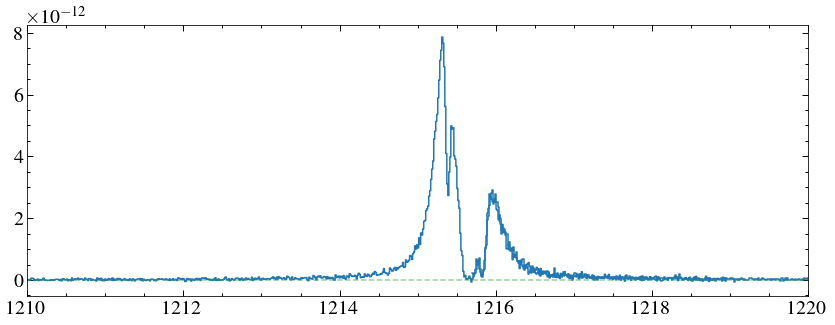

/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/o5cy01020_x1d.fits
E140M


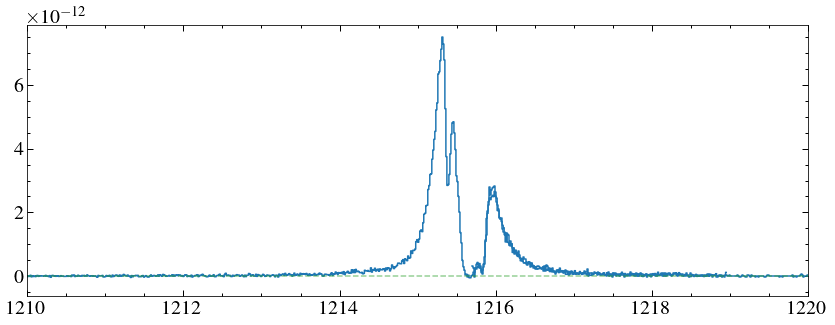

/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/oee504010_x1d.fits
E230H


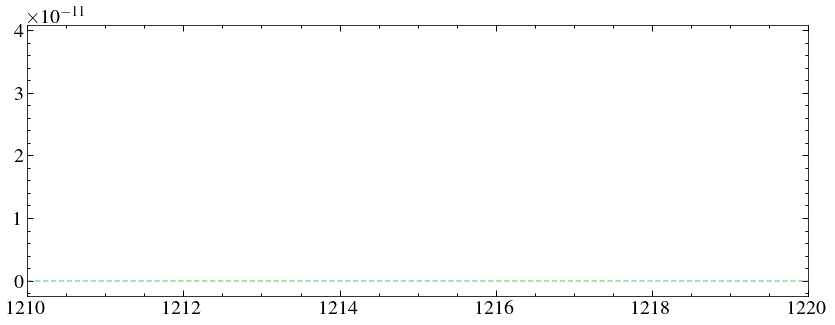

In [55]:
#echelle data
#just found out= apparently not selecting the order sets all of the orders to data?
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
    for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1160
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1')
        # plt.yscale('log')
        # plt.xlim(1300, 1350)
    # plt.ylim(-1e-13, 1e-13)
    plt.xlim(1210, 1220)
    plt.axhline(0, c='C2', alpha=0.5, ls='--')    
    plt.show()


(2790.0, 2810.0)

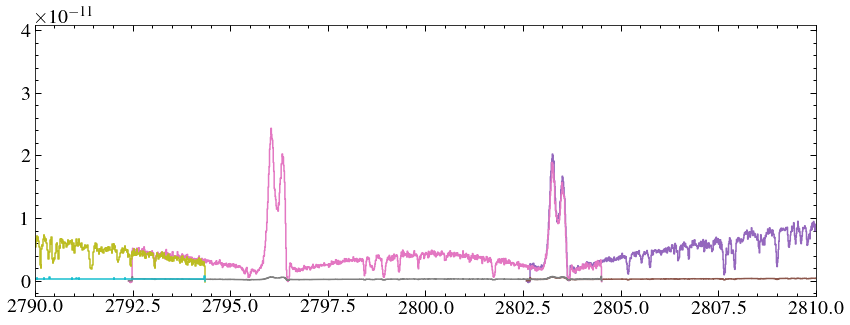

In [31]:
for dt in data:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1160
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid')
        plt.step(w, e, where='mid')
plt.xlim(2790, 2810)

In [35]:
import importlib
import stis_echelle_splice as stisfix
importlib.reload(stisfix)


<module 'stis_echelle_splice' from '/home/david/work/meats/SEDs/stis_echelle_splice.py'>

need to modify echelle splice for more than one data array -done I think

In [36]:
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/o5cy01010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/o5cy01020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/tau_ceti/oee504010_x1d.fits'],
      dtype='<U68')

o5cy01010


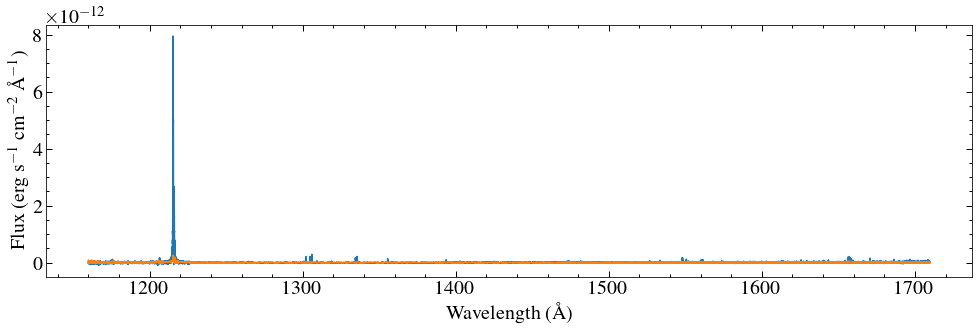

o5cy01020


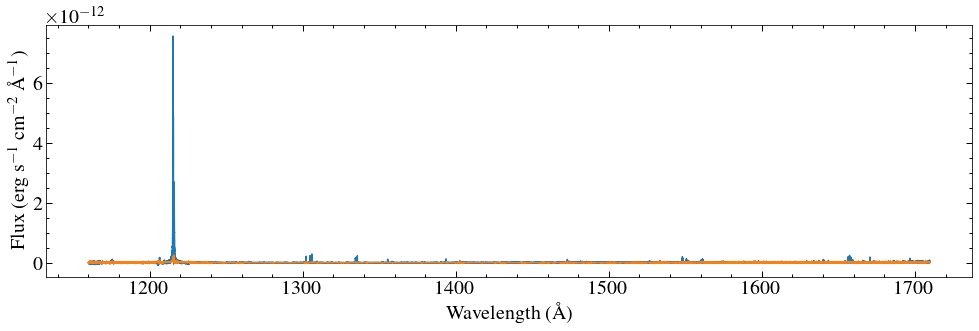

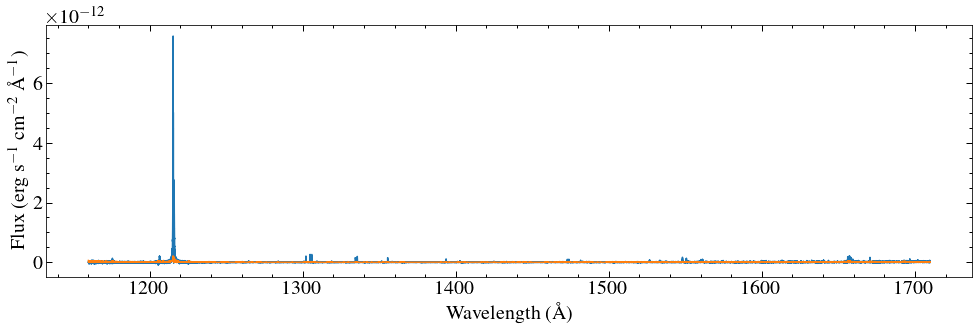

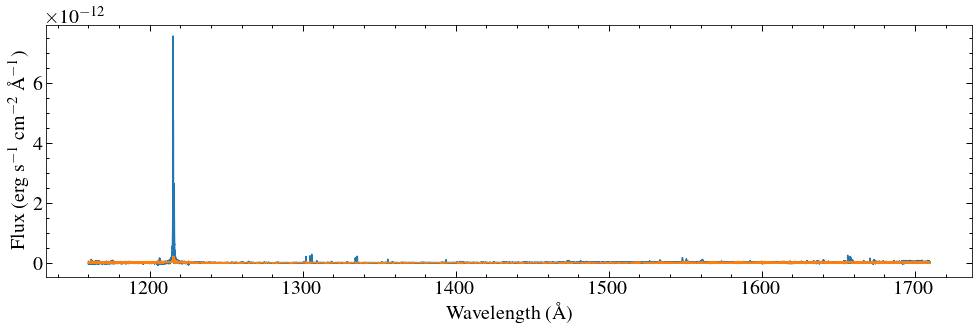

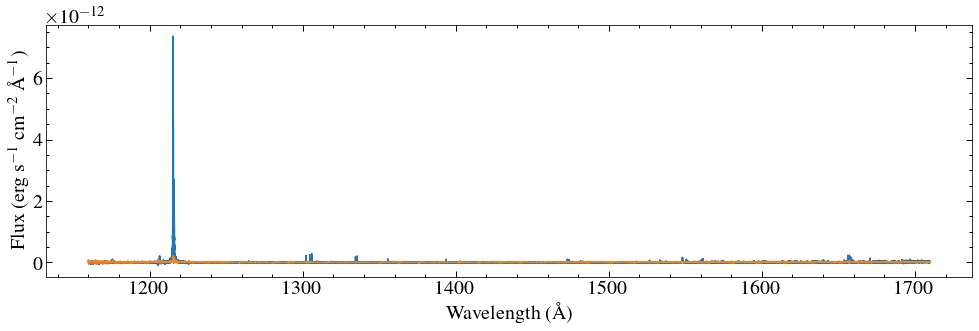

oee504010


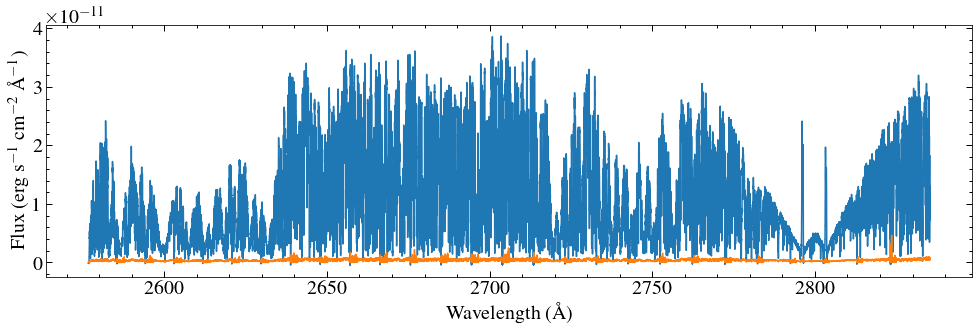

Done


In [62]:
stisfix.splice(filepath = path, outpath = 'misc_data/tau_ceti_spliced/')

misc_data/tau_ceti_spliced/oee504010_spliced.fits
E230H


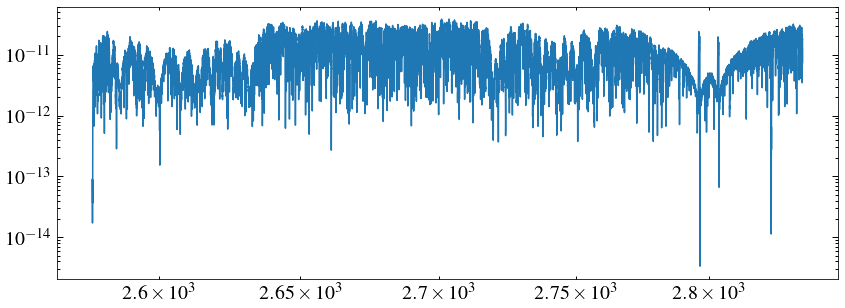

In [61]:
spliced_x1ds = glob.glob('misc_data/tau_ceti_spliced/*spliced.fits')

for x in spliced_x1ds[-1:]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    # print(data['A2Center'])
   
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = (w > 1160) & (f >0)
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid', c='C1')
    
plt.yscale('log')
plt.xscale('log')
# plt.xlim(1300, 1350)
# plt.ylim(1e-12)
# plt.show()